# Training Neural Network using Mini-Batches

Objective:
- Use mini-batches, rather than full a batche, which can speed the training 
- Show that using mini-batches the training time is reduced.
- Show that using mini-batches the cost converges faster to small cost.

In [1]:
import numpy as np
import neural_networks
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
import time
import math

### Data to Classify

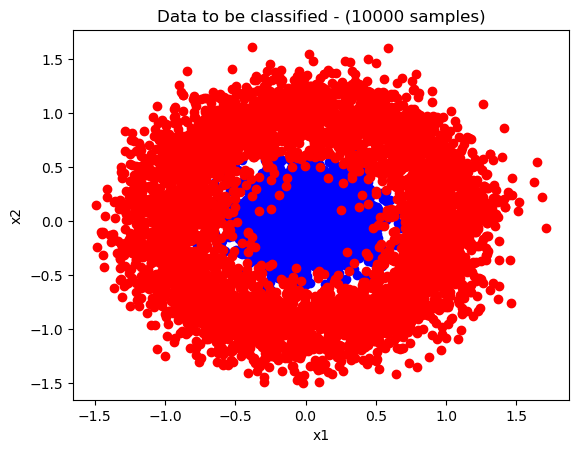

In [30]:
#Data:
# Create a datapoints using skilearn make_moons function
x, y = make_circles(n_samples=10000, shuffle=True, noise=.2, random_state=1, factor=0.01)

# Create a scatter plot with a red dashed line
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', marker='o')
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', marker='o')
# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data to be classified - (10000 samples)')
plt.show()

In [31]:
# PREPRATE THE DATA
x = x.T
y = y.reshape((1,-1))

# Split the data into train and test dataset:
train_size = int(0.90*y.shape[1])
x_train = x[:,0:train_size]
y_train = y[:,0:train_size]

x_test = x[:,train_size:]
y_test = y[:,train_size:]

## Train Neural Networks

### Train model - Using Batch Gradient Descent

In [4]:
#01 Create Hidden Layers:

l_1 = neural_networks.NN_Layer(layer='l1', units=32, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
l_2 = neural_networks.NN_Layer(layer='l2', units=64, activation_func='relu')
l_3 = neural_networks.NN_Layer(layer='l3', units=128, activation_func='relu')
l_4 = neural_networks.NN_Layer(layer='l4', units=200, activation_func='relu')
l_5 = neural_networks.NN_Layer(layer='l5', units=128, activation_func='relu')
l_6 = neural_networks.NN_Layer(layer='l6', units=1, activation_func='sigmoid') # Neural network layer with 1 units and sigmoid activation function.

#02 Create Model:
model_batch = neural_networks.NN(hidden_layers=[l_1, l_2, l_3, l_4, l_5, l_6])

#03 Train Model:
t0= time.time()
model_batch.train(
    features=x_train,            # X vector, features
    labels=y_train,              # Y vector, labels
    alpha=0.1,                   # Learning rate
    nr_epochs=500,               # Number of iterations of optimization through all the dataset
    batch_size=y_train.shape[1], # Take as a single batch
    l2_regularization=True,      # No regularization applied
    lambd=0.5,                   # Regularization factor
    e=1e-10)


t1=time.time()
print(f'Execution time: {t1-t0} seconds')

Epoch: 0 | Cost: 0.31790174164322277
Epoch: 100 | Cost: 0.058006879886443916
Epoch: 200 | Cost: 0.05492034882640603
Epoch: 300 | Cost: 0.05440723560164263
Epoch: 400 | Cost: 0.05414885199106574
Execution time: 60.16694736480713 seconds


### Train model - Using Mini-Batch Gradient Descent

In [5]:
#01- Create Hidden Layers:

l1 = neural_networks.NN_Layer(layer='l1', units=32, activation_func='relu') # Neural network layer with 18 units and reLu activation function.
l2 = neural_networks.NN_Layer(layer='l2', units=64, activation_func='relu')
l3 = neural_networks.NN_Layer(layer='l3', units=128, activation_func='relu')
l4 = neural_networks.NN_Layer(layer='l4', units=200, activation_func='relu')
l5 = neural_networks.NN_Layer(layer='l5', units=128, activation_func='relu')
l6 = neural_networks.NN_Layer(layer='l6', units=1, activation_func='sigmoid')

#02 Create Model:
model_minibatch = neural_networks.NN(hidden_layers=[l1, l2, l3, l4, l5, l6])

#03 Train Model:
t0= time.time() # to time execution

model_minibatch.train(
    features=x_train,       # X vector, features
    labels=y_train,         # Y vector, labels
    alpha=0.1,              # Learning rate
    nr_epochs=500,          # Number of iterations of optimization through all the dataset
    batch_size=2**7,        # Size of each batch of data
    l2_regularization=True, # No regularization applied
    lambd=0.5,              # Regularization factor
    e=1e-17)

t1 = time.time()
print(f'Execution time: {t1-t0} seconds')

Epoch: 0 | Cost: 0.03552066365389454
Epoch: 100 | Cost: 0.029492767298926154
Epoch: 200 | Cost: 0.02724209035541259
Epoch: 300 | Cost: 0.02521413462874824
Epoch: 400 | Cost: 0.023343393264710126
Execution time: 52.78398108482361 seconds


Traning execution time:
- Using batch gradient descent the training time was 60.1s, while using mini-batch gradient descent the train time was 52.7s. <br>

The gain in time is due to the fact that a smaller batch of data goes forward and backward through the neural network at once which makes the computation be faster than the whole chunk of training dataset has to be computed at once.  

### Models Performance

In [6]:
# Evaluate Performance of the model on TEST set:

#01- Batch Gradient Descent
# Model Prediction on the testing data:
y_hat_batch = model_batch.predict(x_test)

# Calculate Accuracy of the model:
print(
    f'Batch Model Accuracy with: {1- np.sum(np.power(np.where(y_hat_batch>=0.5, 1, 0) - y_test, 2))/(y_test.shape[1])}')


#02- Mini-Batch Gradient Descent

# Model Prediction on the testing data:
y_hat_minibath = model_minibatch.predict(x_test)

# Calculate Accuracy of the model:
print(
    f'Mini-Batch Model Accuracy with: {1- np.sum(np.power(np.where(y_hat_minibath>=0.5, 1, 0) - y_test, 2))/(y_test.shape[1])}')


Batch Model Accuracy with: 0.981
Mini-Batch Model Accuracy with: 0.978


Models performance are overall the same.

### Plot cost over epochs

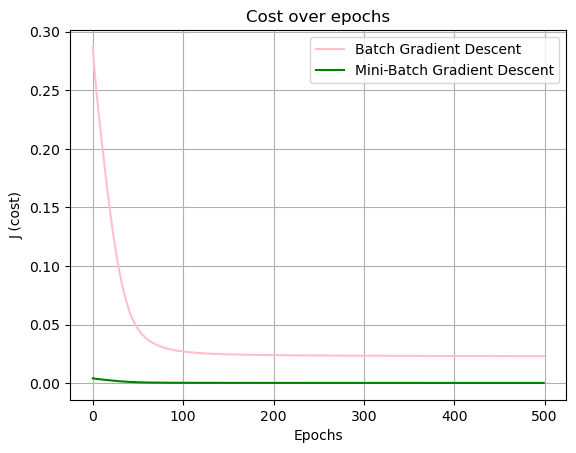

In [7]:
# Plot the Cost over each epoch:


# Get the cost after each full epoch:
batch_size = 2**7
number_batches = math.ceil(y_train.shape[1]/batch_size)
#cost_batch=[]
cost_minibatch = []
for i in range(0,500):
    #02- Mini-Batch Gradient Descent model:
    cost_minibatch.append(model_minibatch.cost[i*number_batches])

# Plot results - Batch:
plt.plot(np.arange(0,500, 1), 
         model_batch.cost, 
         color='pink', label='Batch Gradient Descent')  

# Plot result - Mini-Batch:
plt.plot(np.arange(0,500, 1), 
         cost_minibatch, 
         color='green', label='Mini-Batch Gradient Descent')  
# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('J (cost)')
plt.title('Cost over epochs')
plt.legend()
plt.grid(True)
plt.show()

When using Mini-batch Gradient Descent the the algorithm will converge faster, as the values of dw and db are updated after the processing of each mini-batch of data, whereas in Batch Gradient Descent dw,db have to wait until all the train data is seen, before their values be updated.

As a result, Mini-batch Gradient Descent needs less epochs to train the model.

note:<br>
The conveged cost of Mini-batch and Batch gradient descent are different, as the cost of Mini-batch Grad. Descent is related to batch of data whereas in Batch Gradient desc. the cost is related to the whole train dataset.

### Plot Model Decision Boundary

In [32]:
#- Generate points to form the decision boundary:
x1_min, x1_max = x[0,:].min(), x[0,:].max() 
x2_min, x2_max = x[1,:].min(), x[1,:].max()
x1, x2= np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                    np.linspace(x2_min, x2_max, 1000))
x_grid = np.c_[x1.ravel(), x2.ravel()].T

In [33]:
#- Predict usinging the trained model:
y_hat_grid_batch = model_batch.predict(x_grid)
y_hat_grid_minibatch = model_minibatch.predict(x_grid)

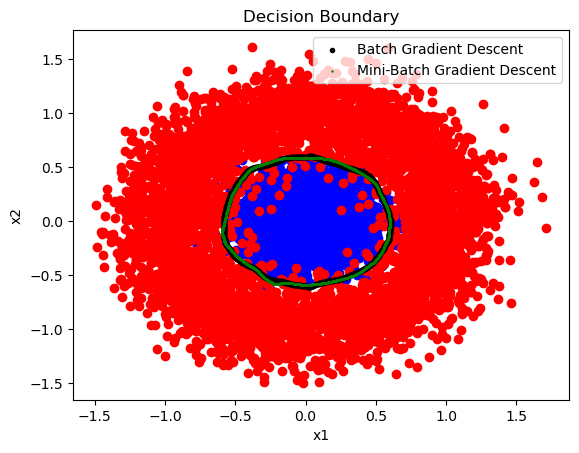

In [34]:
#- Plot results:

#-Plot data
plt.scatter(x[:, (y == 1).reshape(-1)][0, :],
            x[:, (y == 1).reshape(-1)][1, :], color='blue', marker='o')
plt.scatter(x[:, (y == 0).reshape(-1)][0, :],
            x[:, (y == 0).reshape(-1)][1, :], color='red', marker='o')

#- Plot decision boundary:
plt.scatter(x_grid[:, np.logical_and(y_hat_grid_batch >= 0.49, y_hat_grid_batch <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_grid_batch >= 0.49, y_hat_grid_batch <= 0.51).reshape(-1)][1, :], color='black', marker='.',  
            label='Batch Gradient Descent')

plt.scatter(x_grid[:, np.logical_and(y_hat_grid_minibatch >= 0.49, y_hat_grid_minibatch <= 0.51).reshape(-1)][0, :],
            x_grid[:, np.logical_and(y_hat_grid_minibatch >= 0.49, y_hat_grid_minibatch <= 0.51).reshape(-1)][1, :], color='green', marker='.', s=2,
            label='Mini-Batch Gradient Descent')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.legend()
plt.show()

Author:<br>
Emerson Goncalves